# Deep Learning using Keras

__The outline of this notebook__:

I. What is Keras?

II. How does Keras work?

III. What are the advantages and disadvantages?

IV. Key concepts in Deep Learning

V. Recommendation System using Keras

## What is Keras?

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

## How does Keras work?

Keras is an interface rather than a standalone framework, like TensorFlow. It offers high-level, intuitive abstractions that enable fast experimentation.
    
__Analogy One__: Keras is to TensorFlow as seaborn is to matplotlib

## What are the advantages and disadvantages

### Advatages 

__User friendliness__ 

It prioritizes user experience. Minimizes cognitive load. Constant. Simple. Reduces the number of user actions. Popular. Backed by a large and active community.

__Modularity and Easy extensibility__

Neural layers, functions, schemes, and optimizers, are all standalone modules that you can combine to create new models if you please.

__Work with Python__

Pretty self explanatory. Python code = compact, easier to debug, and allows for ease of extensibility.

### Disadvatage

__Limited control__

Keras is a beautifully written API that doesn’t block access to lower level frameworks. That being said, Keras isn’t really designed for you to change the underlying architecture of your model. You can customize your layers in Keras (here’s a great example), but it might make sense for you to just use TensorFlow. Depending on what you’re trying to do, you might have implement your training routine outside of Keras.

## Key concepts in Deep Learning

### Input Data
- Input data in DL can be of a veriety of types. Essentially, the model undestand datra as "tensors".

- Tensors are nothing but a generic form for vectors, or in computer engineering terms, a simple n-dimensional matrix. A funny view of tensor could be found as follow

![tensor](movielen-imgs/tensor.pnp)

__It is a good practice to normalize, standardize, or scale the input values before training__.

## Neuron

- At the core of the DNN, we have neurons where computation for an output is executed.A neuron receives one or more inputs from the neurons in the previous layer.

![neuron](movielen-imgs/neuron.png)

__If a higher-­influence input is received, the output should be higher, and vice versa(i.e., higher influence -> then activate, otherwise deactivate)__.

## Activation function

An activation function takes the combined input z as shown in the above illustration, applies a function on it, and passes the output value. Why do we really need an activation function: 

- The range of the output value would be -Inf to + Inf, where we won’t have a clear way of defining a threshold where activation should happen.

- We can say that if your activation function is a linear function (basically no activation), then the derivative of that function becomes 0. 

A very good articles about activation functions could be found [here](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)

__There are a variety of choices available to use as an activation function. The most common ones are the sigmoid function and the ReLU.__

## Model

The overall structure of a DNN is developed using the model object in Keras. This provides a simple way to create a stack of layers by adding new layers one after the other.

__The easiest way to define a model is by using the sequential model, which allows easy creation of a linear stack of layers.__

## Layers

A layer in the DNN is defined as a group of neurons or a logically separated group in a hierarchical network structure.
To simplify the model development process, Keras provides us with several types of layers and various means to connect them.

### Dense Layer

- A dense layer is a regular DNN layer that connects every neuron in the defined layer to every neuron in the previous layer.

- Dense layer offers a lot of customization for any given layer. We can specify the number of units (i.e., neurons for the layer), the activation type, the type initialization for kernel and bias, and other constraints. 

__For the the first layer, the input shape needs to be defined (by providing value for `input_dim`). Subsequent layers just need the number of neurons defined__.

### Dropout Layer

The dropout layer in DL helps reduce overfitting by introducing regularization and generalization capabilities into the model.
We add the dropout layer after a regular layer in the DL model architecture.

### Other Important Layers

Other important layers such as: Embedding, Convolutional, Pooling,   Merge, Recurrent,... could be found [here](https://keras.io/)

## The Loss Function

The loss function is the metric that helps a network understand whether it is learning in the right direction. Some popular loss functions in case the __end prediction__ would be a __continuous number__ are: __Mean Squared Error, Mean Absolute Error, Other variants__

A few popular choices for losses for __categorical outcomes__ are: __Binary cross-entropy, Categorical cross-entropy__. 

## Optimizers

The most important part of the model training is the optimizer. Up to this point, we have addressed the process of giving feedback to the model through an algorithm called __backpropagation__; this is actually an optimization algorithm.

The optimizer function is a mathematical algorithm that uses derivatives, partial derivatives, and the chain rule in calculus to understand how much change the network will see in the loss function by making a small change in the weight of the neurons. The Stochastic Gradient Descent(SGD) and Adaptive Moment Estimation(Adam) are the most popular optimizers in deep learning.

### SGD

SGD performs an iteration with __each training sample__ (i.e., after the pass of every training sample, it calculates the loss and updates the weight). Since the weights are updated too frequently, the overall loss curve very noisy.

![SGDvsBGD](movielen-imgs/SGDvsBGD.png)

__To reduce high fluctuations in the SGD optimizations, we reduce the number of iterations by providing minibatch which will enable averaging the loss for all samples in a batch and updating the weights at the end of the batch. Batch size is usually set in powers of 2 (i.e., 32, 64, 128, etc.)__.

###  Adam

It defines momentum and variance of the gradient of the loss and leverages a combined effect to update the weight parameters. The momentum and variance together help smooth the learning curve and effectively improve the learning process.

__Adam is the most popular and widely used optimizer in DL so far. In most case, you can blindly choose the Adam optimizer and forget about the optimization alternatives__. 

### Other Important Optimizers

The other popular optimization alternatives used and available within Keras: Adagrad, Adadelta, RMSProp, Adamax, Nadam

## Metrics

Metrics can be understood as the function used to judge the performance of the model on a different unseen dataset, also called the validation dataset.

The only difference between metrics and the loss function is that the results from metrics are not used in training the model with respect to optimization.

## Recommendation System using Keras

In this notebook, I'll use Keras to build a deep learning model movie recommendations system on the MovieLens 1M dataset. 

We want to build a model that takes a user, $u_i$ and a movie, $m_j$, and outputs a number from 0.5-5, representing how many stars we think this user would give that movie. 

> **Aside:** You may have noticed that the [MovieLens dataset](https://github.com/hoducninh/Scikitlearn-sparkML-Keras/tree/master/movilen-dataset) includes information about each movie such as its title, its year of release, a set of genres and user-assigned tags. But for now, we're not going to try to exploit any of that extra information.

__we need an embedding layer to handle these inputs__. 

In short, an **embedding layer** maps each element in a set of discrete things (like words, users, or movies) to a dense vector of real numbers (its **embedding**). 

> **Aside:** A key implementation detail is that embedding layers take as input the *index* of the entity being embedded (i.e. we can give it our userIds and movieIds as input). You can think of it as a sort of 'lookup table'. This is much more efficient than taking a one-hot vector and doing a huge matrix multiplication!

As an example, if we learn embeddings of size 8 for movies, the embedding for *Tarzan* might look like:

$$[ 1.624, -0.612, -0.528, -1.073,  0.865, -2.302,  1.745, -0.761]$$

**Where do these come from?** We initialize an embedding for each user and movie using random noise, then we train them as part of the process of training the overall rating-prediction model. 

**What do they mean?** An object's embedding, if it's any good, should capture some useful latent properties of that object. A very good article about embeddings could be found [here](https://jalammar.github.io/illustrated-word2vec/?utm_source=hackernewsletter&utm_medium=email&utm_term=data)

The structure of our model should be like this: 

![embeddings](movielen-imgs/Z1eVQu9.png)

We will use the more powerful functional API which is [keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model) class instead of [keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class.

## Implement model

### Loading data

In [1]:
import random
from functools import lru_cache
import os
import math

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Reading movies file
ratings_df = pd.read_csv('movilen-dataset/ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])
movies_df = pd.read_csv('movilen-dataset/movies.csv', sep='\t', encoding='latin-1').drop(columns='Unnamed: 0',axis=1)

movies_ratings_df = ratings_df.merge(movies_df, on='movie_id').sort_values(by='user_id')

#Data for training 
df = movies_ratings_df[['user_id', 'movie_id', 'rating']].rename(columns={'rating': 'y'})

#save movies_ratings_df for later use 
movies_ratings_df.to_csv('movilen-dataset/movies_ratings_df.csv')

In [2]:
df.head(2)

,user_id,movie_id,y
0,1,1193,5
28501,1,48,5


### Build the model 

In [3]:
hidden_units = (32,4)
movie_embedding_size = 8
user_embedding_size = 8

# Each instance will consist of two inputs: a single user id, and a single movie id
user_id_input = keras.Input(shape=(1,), name='user_id')
movie_id_input = keras.Input(shape=(1,), name='movie_id')
user_embedded = keras.layers.Embedding(df.user_id.max()+1, user_embedding_size, 
                                       input_length=1, name='user_embedding')(user_id_input)
movie_embedded = keras.layers.Embedding(df.movie_id.max()+1, movie_embedding_size, 
                                        input_length=1, name='movie_embedding')(movie_id_input)
# Concatenate the embeddings (and remove the useless extra dimension)
concatenated = keras.layers.Concatenate()([user_embedded, movie_embedded])
out = keras.layers.Flatten()(concatenated)

# Add one or more hidden layers
for n_hidden in hidden_units:
    out = keras.layers.Dense(n_hidden, activation='relu')(out)

# A single output: our predicted rating
out = keras.layers.Dense(1, activation='linear', name='prediction')(out)

model = keras.Model(
    inputs = [user_id_input, movie_id_input],
    outputs = out,
)
model.summary(line_length=88)

________________________________________________________________________________________
Layer (type)                 Output Shape       Param #   Connected to                  
user_id (InputLayer)         (None, 1)          0                                       
________________________________________________________________________________________
movie_id (InputLayer)        (None, 1)          0                                       
________________________________________________________________________________________
user_embedding (Embedding)   (None, 1, 8)       48328     user_id[0][0]                 
________________________________________________________________________________________
movie_embedding (Embedding)  (None, 1, 8)       31624     movie_id[0][0]                
________________________________________________________________________________________
concatenate (Concatenate)    (None, 1, 16)      0         user_embedding[0][0]          
                     


We'll compile our model to minimize squared error ('MSE'). We'll also include absolute error ('MAE') as a metric to report during training, since it's a bit easier to interpret.

In [4]:
model.compile(
    # Technical note: when using embedding layers, I highly recommend using one of the optimizers
    # found  in tf.train: https://www.tensorflow.org/api_guides/python/train#Optimizers
    # Passing in a string like 'adam' or 'SGD' will load one of keras's optimizers (found under 
    # tf.keras.optimizers). They seem to be much slower on problems like this, because they
    # don't efficiently handle sparse gradient updates.
    tf.train.AdamOptimizer(0.005),
    loss='MSE',
    metrics=['MAE'],
)

In [5]:
df.columns

Index(['user_id', 'movie_id', 'y'], dtype='object')

In [6]:
df['movie_id'].nunique()

3706

### Training it

This step will be the most-time consuming one. In my particular case, for our dataset with above 1 million ratings, more than 6,000 users and almost 4,000 movies, I trained the model in roughly 6 minutes per epoch (30 epochs ~ 3 hours) inside my Macbook Laptop CPU. I spitted the training and validataion data with ratio of 90/10.

In [7]:
history = model.fit(
    [df.user_id, df.movie_id],
    df.y,
    batch_size=5000,
    epochs=20,
    verbose=0,
    validation_split=.1,
);

We save the model for future use.

In [8]:
# Save training history for later comparison
hdf = pd.DataFrame(dict(
    epoch=history.epoch,
    val_mae=history.history['val_mean_absolute_error'],
    train_mae=history.history['mean_absolute_error'],
))
hdf.to_csv('history-1.csv')

Here's a plot of our embedding model's absolute error over time.

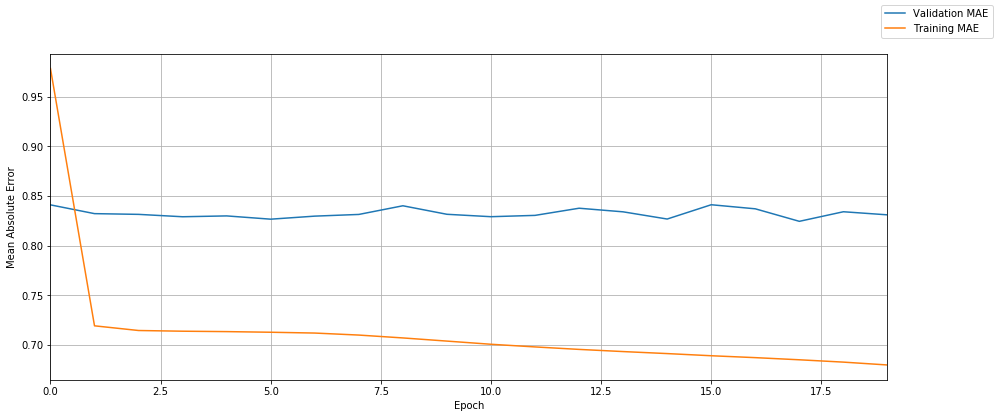

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(history.epoch, history.history['val_mean_absolute_error'], label='Validation MAE')
ax.plot(history.epoch, history.history['mean_absolute_error'], label='Training MAE')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Absolute Error')
ax.set_xlim(left=0, right=history.epoch[-1])
#baseline_mae = 0.73
#ax.axhline(baseline_mae, ls='--', label='Baseline', color='#002255', alpha=.5)
ax.grid()
fig.legend();

Not bad!

## Example predictions

Let's try some example predictions as a sanity check. We'll start by picking out a specific user from the dataset at random.

In [10]:
ratings_per_user = df.groupby('user_id').size()
uid = ratings_per_user[ratings_per_user < 30].sample(1, random_state=1).index[0]

user_ratings = movies_ratings_df[movies_ratings_df.user_id==uid]
print("User #{} has rated {} movies (avg. rating = {:.1f}):".format(
    uid, len(user_ratings), user_ratings['rating'].mean(),
))
cols = ['user_id', 'movie_id', 'rating', 'title', 'genres']
user_ratings.sort_values(by='rating', ascending=False)[cols].head(7)

User #5388 has rated 24 movies (avg. rating = 4.0):


,user_id,movie_id,rating,title,genres
135615,5388,1198,5,Raiders of the Lost Ark (1981),Action|Adventure
159777,5388,349,5,Clear and Present Danger (1994),Action|Adventure|Thriller
193829,5388,1291,5,Indiana Jones and the Last Crusade (1989),Action|Adventure
351003,5388,1573,5,Face/Off (1997),Action|Sci-Fi|Thriller
27891,5388,527,5,Schindler's List (1993),Drama|War
166142,5388,3418,4,Thelma & Louise (1991),Action|Drama
125518,5388,2353,4,Enemy of the State (1998),Action|Thriller


User 5388 seems to give the perfect point for films with genres of Action and Adventure. The user might not like the Comedy films as he or she gave the low points for these films. 

With our intuition, lets try to give prediction for films for two films he may like `Poseidon Adventure, The (1972)`, `Free Willy 2: The Adventure Home (1995)`, and one films he may dislike `Adventures of Elmo in Grouchland, The (1999)`. 

In [11]:
movies_df[
    (movies_df.title == 'Poseidon Adventure, The (1972)')
    | (movies_df.title == 'Free Willy 2: The Adventure Home (1995)')
    | (movies_df.title == 'Adventures of Elmo in Grouchland, The (1999)')
]

,movie_id,title,genres
167,169,Free Willy 2: The Adventure Home (1995),Adventure|Children's|Drama
1944,2013,"Poseidon Adventure, The (1972)",Action|Adventure
2817,2886,"Adventures of Elmo in Grouchland, The (1999)",Children's|Comedy


In [12]:
candidate_movies = movies_df[
    (movies_df.title == 'Poseidon Adventure, The (1972)')
    | (movies_df.title == 'Free Willy 2: The Adventure Home (1995)')
    | (movies_df.title == 'Adventures of Elmo in Grouchland, The (1999)')
].copy()

preds = model.predict([
    [uid] * len(candidate_movies), # User ids 
    candidate_movies.index, # Movie ids
])

In [13]:
preds

array([[3.481594 ],
       [3.9872577],
       [2.3681152]], dtype=float32)

Looks pretty reasonable! 